### Implémentation de régression linéaire et création d'une interface graphique avec Tkinter 

#### On commence par importer des bibliothèques nécessaires pour le projet

In [2]:
%matplotlib inline  
from tkinter import filedialog
from tkinter import messagebox
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from tkinter import *
import numpy as np
from sklearn.linear_model import LinearRegression

# 1 ère Partie

In [6]:
# utiliser pd.read_csv pour lire votre premier data qui se trouve dans data1.csv
#-------------Votre code ici: ----------------------
df = pd.read_csv("data1.csv")


### Mettez dans X la première colonne du dataset et dans Y la deuxième colonne du dataset

In [7]:
# Utiliser iloc 
#------------Votre code ici: ------------------------

x = np.array(df.iloc[:, 0].values)
y = np.array(df.iloc[:, 1].values)

### On visualise nos données sur un jeu d'axes avec matplotlib

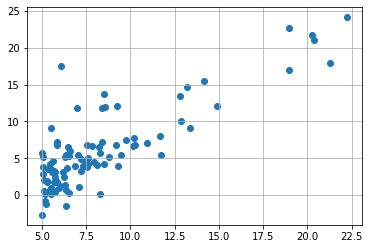

In [8]:
axes = plt.axes()
axes.grid()
plt.scatter(x,y)
plt.show()

### Maintenant essayez de mettre un légende et un titre sur le dessin ci-dessus

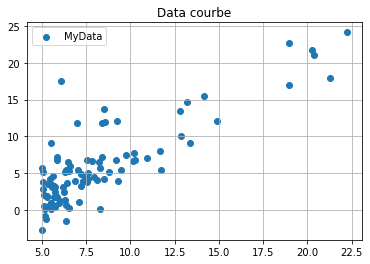

In [9]:
#--------------------Votre code ici ----------------------------
axes = plt.axes()
axes.grid()
plt.scatter(x,y)
plt.legend(["MyData"])
plt.title('Data courbe')
plt.show()

## Premier modèle de régression linéaire 

- On va utiliser la librairie SciPy (Scientific Python) pour implémenter une régression linéaire. Le sous package stats nous donne une fonction qui s'appelle linregress pour arriver à cette fin.

- Consultez la documentation très claire ici : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [10]:
#---------------------Votre code ici --------------------------


slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

### Le Modèle sera au fait une fonction de prédiction sous forme d'une droite



\begin{align}
f(x) = intercept + slope * x
\end{align}

avec :
* $slope$ : représente la "pente" de la droite de prédiction 
* $intercept$ : représente le biais (ou le point d'intersection avec l'axe des x)




#### Définir ici une fonction predire_1 qui a pour entrée x et pour sortie une prédiction de y utilisant les coefficient calculés ci-dessus

In [11]:
# définition de predire_1
#---------------Votre code ici -----------------------------
def predire_1(x):
    prediction = intercept + slope * x
    return prediction

### Dessiner les données initiales (en bleu) et la fonction de prédiction trouvée (en rouge) dans la même fenêtre

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

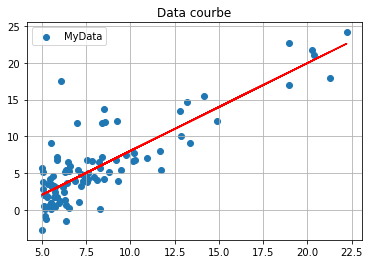

In [13]:
#------------Votre code ici-------------------------
axes = plt.axes()
axes.grid()
plt.scatter(x, y)
# Add a legend and a title
plt.legend(["MyData"])
plt.title('Data courbe')
plt.plot(x, predire_1(x), c="red")
plt.show()

#### Calculer le vecteurs des erreurs entre la prédiction et la vraie valeur y de votre dataset puis l'erreur moyenne. 
#### Ensuite ajoutez dans le dessin ci-dessus des lignes verticales qui montrent l'erreur commise pour chaque donnée


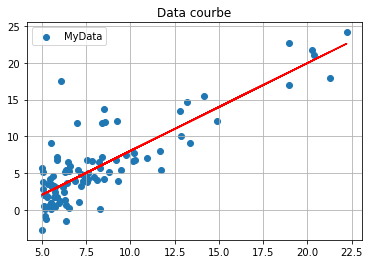

In [14]:
#--------------------Votre code ici--------------------

error = 0
for a, b in zip(y, predire_1(x)):
    error += (a - b) ** 2
    
# dessiner le graph avec l erreur

axes = plt.axes()
axes.grid()
plt.scatter(x, y)
# Add a legend and a title
plt.legend(["MyData"])
plt.title('Data courbe')
plt.plot(x, predire_1(x), c="red")
plt.show()

# Partie 2: Régression avec scikit learn

#### Il s'agit maintenant de faire une régression linéaire comme celle qu'on a faite dans le cours à l'aide de scikit learn. N'oubliez pas d'importer ce qu'il faut comme numpy... etc

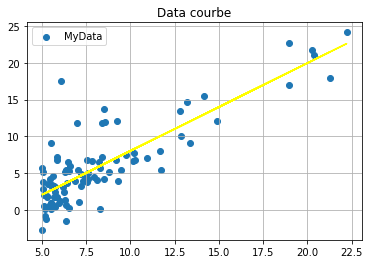

In [15]:
# --- Par exemples---------------
import numpy as np

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression

#------------Votre code ici: Reshape....Split....Fit....plot....predict....
axes = plt.axes()
axes.grid()
plt.scatter(x, y)

# Add a legend and a title
plt.legend(["MyData"])
plt.title('Data courbe')
x = x.reshape((-1, 1))

# instancier modèle
model = LinearRegression()

# entrainement du modèle
model.fit(x, y)

# prédiction
prediction = model.predict(x)
plt.plot(x, prediction, c="yellow")
plt.show()

# Patie 3 : Comparaison des deux fonctions de prédiction

#### Définissez une fonction Comparaison qui prend une valeur X et compare les valeurs prédites par le modèle 1 et le modèle de la partie 2 avec la vraie valeur y 
#### puis faites la comparison moyenne sur toutes les données...
#### La sortie sera la réponse à la question: Quel est le meilleur modèle de prédiction ?

In [16]:
#----------------Votre code ici-----------------------
p1 = predire_1(x)
p2 = prediction
s_p1 = 0
s_p2 = 0
for a, p_1, p_2 in zip(y, p1, p2):
    f = a - abs(p_1)
    s = a - abs(p_2)
    if f > s:
        s_p1 += 1
    elif f < s:
        s_p2 += 1
    else:
        s_p2 += 1
        s_p1 += 1

if s_p1 > s_p2:
    print("le premier de scipy module est plus precis")
elif s_p1 < s_p2:
    print("le deuxieme module sklearn est plus precis")
else:
    print("les deux modules ont la meme precision")

les deux modules ont la meme precision


# Partie 4: fenêtre graphique

# Dans cette partie il vous est demandé de :
- créer une fenêtre à l'aide de Tkinter qui servira comme interface graphique
- la fenêtre contiendra un premier bouton qui vous demande d'entrer le nom du fichier de data.csv
- Deux autres boutons : bouton_prédiction_modèle_1 et bouton_prédiction_modèle_2 par exemples
- Un dernier bouton : Meilleure_prédiction 
- Chaque bouton doit exécuter les programmes que vous avez écrits en parties 1, 2 et 3

# j'ai essayé de grouper tous le programes sous forme des fonctions pour faciliter le travaille 

In [3]:
#------------Votre code ici-----------------

df = ""
x = None
y = None


# premiere methode d'importation du fichier csv
def importFile():
    window.filename = filedialog.askopenfilename(initialdir="/", title="Select file",
                                                 filetypes=(("csv files", "*.csv"), ("all files", "*.*")))
    global df
    global x
    global y

    df = pd.read_csv(window.filename)
    x = df['first']
    y = df['second']
    return df, x, y


# premiere methode de prediction
def predict_1(x, y):
    if x is not None and y is not None:
        results = stats.linregress(x, y)
        slope, intercept, r_value, p_value, std_err = results

        predection = intercept + slope * x

        error = 0
        for a, b in zip(y, predection):
            error += (a - b) ** 2

        # Il manque comment faire les lignes verticales qui montrent l'erreur commise pour chaque données
        return predection


# deuxieme methode de prediction
def predict_2(x, y):
    if x is not None and y is not None:

        x = x.values.reshape((-1, 1))
        y = y
        # instancier modèle
        model = LinearRegression()
        # entrainement du modèle
        model.fit(x, y)
        # prédiction
        prediction = model.predict(x)
        return prediction

def showGraph(prediction,color):
    if prediction is not None:
        axes = plt.axes()
        axes.grid()
        plt.scatter(x, y)
        plt.legend(["MyData"])
        plt.title('Data courbe')
        plt.plot(x, prediction, c=color)
        plt.show()
    else:
        tk.messagebox.showerror(title="Alert", message="Select file please ! ")
        

# la meilleure prediction
def best_predict(y0):
    if y0 is not None:
        p1 = predict_1(x, y)
        p2 = predict_2(x, y)
        s_p1 = 0
        s_p2 = 0
        for a, p_1, p_2 in zip(y0, p1, p2):
            f = a - abs(p_1)
            s = a - abs(p_2)
            if f > s:
                s_p1 += 1
            elif f < s:
                s_p2 += 1
            else:
                s_p2 += 1
                s_p1 += 1

        if s_p1 > s_p2:
            tk.messagebox.showinfo(title="Best prediction", message="le premier de scipy module est plus precis")
            showGraph(predict_1(x, y),color='red')
        elif s_p1 < s_p2:
            tk.messagebox.showinfo(title="Best prediction", message="le deuxieme module sklearn est plus precis")
            showGraph(predict_2(x, y),color='yellow')
        else:
            tk.messagebox.showinfo(title="Best prediction", message="les deux modules ont la meme precision")
            showGraph(predict_1(x, y),color='red')
            showGraph(predict_2(x, y),color='yellow')
    else:
        tk.messagebox.showerror(title="Alert", message="Select file please ! ")


# lancement du fenetre graphique
window = Tk()
window.title("IA Exam ")

# Specify Grid
Grid.rowconfigure(window, 0, weight=1)
Grid.columnconfigure(window, 0, weight=1)
Grid.rowconfigure(window, 1, weight=1)

bt1 = Button(window, text="Choissir un fichier", command=importFile, height=5, width=30)
bt2 = Button(window, text="Prediction 1 ( scipy ) ", command=lambda: showGraph(predict_1(x, y),color='red'), height=5, width=30)
bt3 = Button(window, text="Prediction 2 ( Sklearn ) ", command=lambda: showGraph(predict_2(x, y),color='yellow'), height=5, width=30)
bt4 = Button(window, text="Meilleur prediction", command=lambda: best_predict(y), height=5, width=30)

bt1.grid(row=0, column=0, sticky="NSEW")
bt2.grid(row=1, column=0, sticky="NSEW")
bt3.grid(row=2, column=0, sticky="NSEW")
bt4.grid(row=3, column=0, sticky="NSEW")

window.mainloop()